<a href="https://colab.research.google.com/github/Eleemon98/Colaboratory/blob/main/0328_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패션 MNIST 데이셋을 활용한 분류 모델 만들기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 가져오기
data = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [5]:
X_train.ndim

3

In [6]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag', 'Ankle boot']

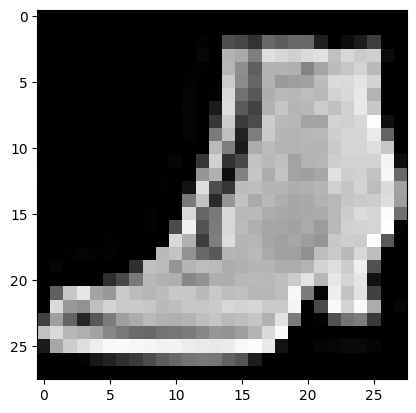

In [13]:
plt.figure()
plt.imshow(X_train[46587], cmap='gray')
plt.grid(False)
plt.show()

In [12]:
label = y_train[46587]
print(class_names[label])

Ankle boot


In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [15]:
# 데이터 스케일링
# 소수데이터로 만들어주기 위해서 MinMax 스케일링을 진행함
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0].max()

1.0

In [17]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

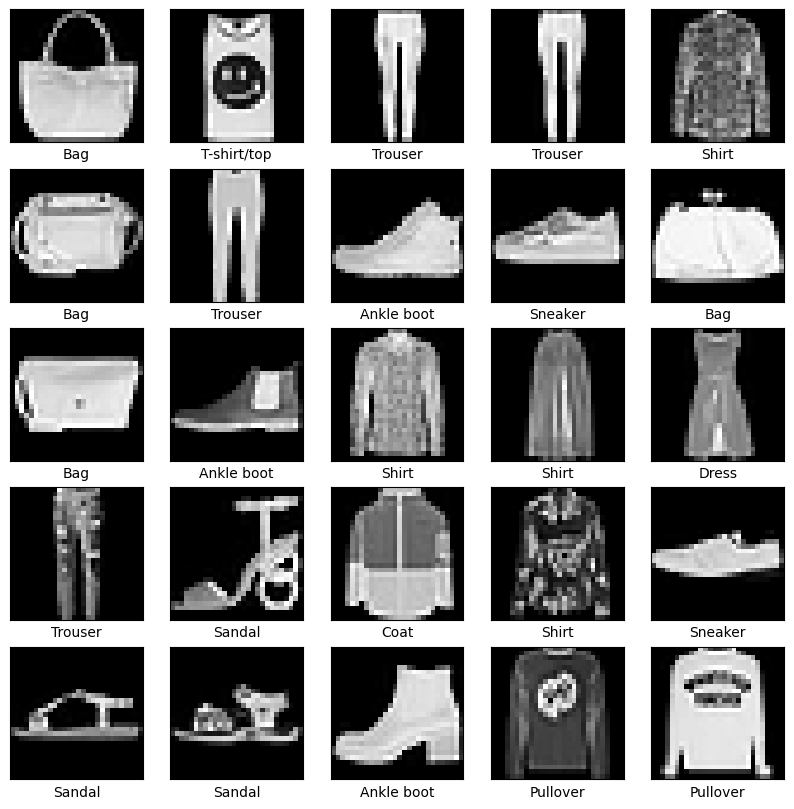

In [19]:
plt.figure(figsize=(10,10))
c = 0

for i in range(100,125):
  c += 1
  plt.subplot(5,5,c)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])

plt.show()

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
# 딥러닝 모델 만들기
model = tf.keras.Sequential()
# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 만들기
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
# 모델 컴파일
# 0이 많은 데이터일 때 쓰는 'SparseCategoricalCrossentropy'이 있음(이미지 같은 것)
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [23]:
# 모델 학습
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7553 - accuracy: 0.7512
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4170 - accuracy: 0.8515
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8695
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3369 - accuracy: 0.8770
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3162 - accuracy: 0.8846
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3004 - accuracy: 0.8885
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2880 - accuracy: 0.8935
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2764 - accuracy: 0.8978
Epoch 9/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2639 - accuracy: 0.9008
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

train 데이터에 대해서는 높은데 test 데이터에 대해서는 낮게 나왔기 때문에 과적합을 의심할 수 있음

In [24]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.4226 - accuracy: 0.8865 - 1s/epoch - 3ms/step


[0.42255669832229614, 0.8865000009536743]

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [28]:
pro_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])
predictions = pro_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
def show_img(i):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], y_test)
  plt.show()

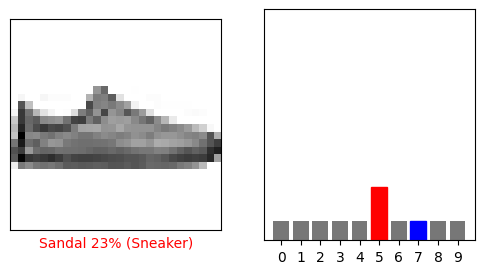

In [44]:
show_img(12)

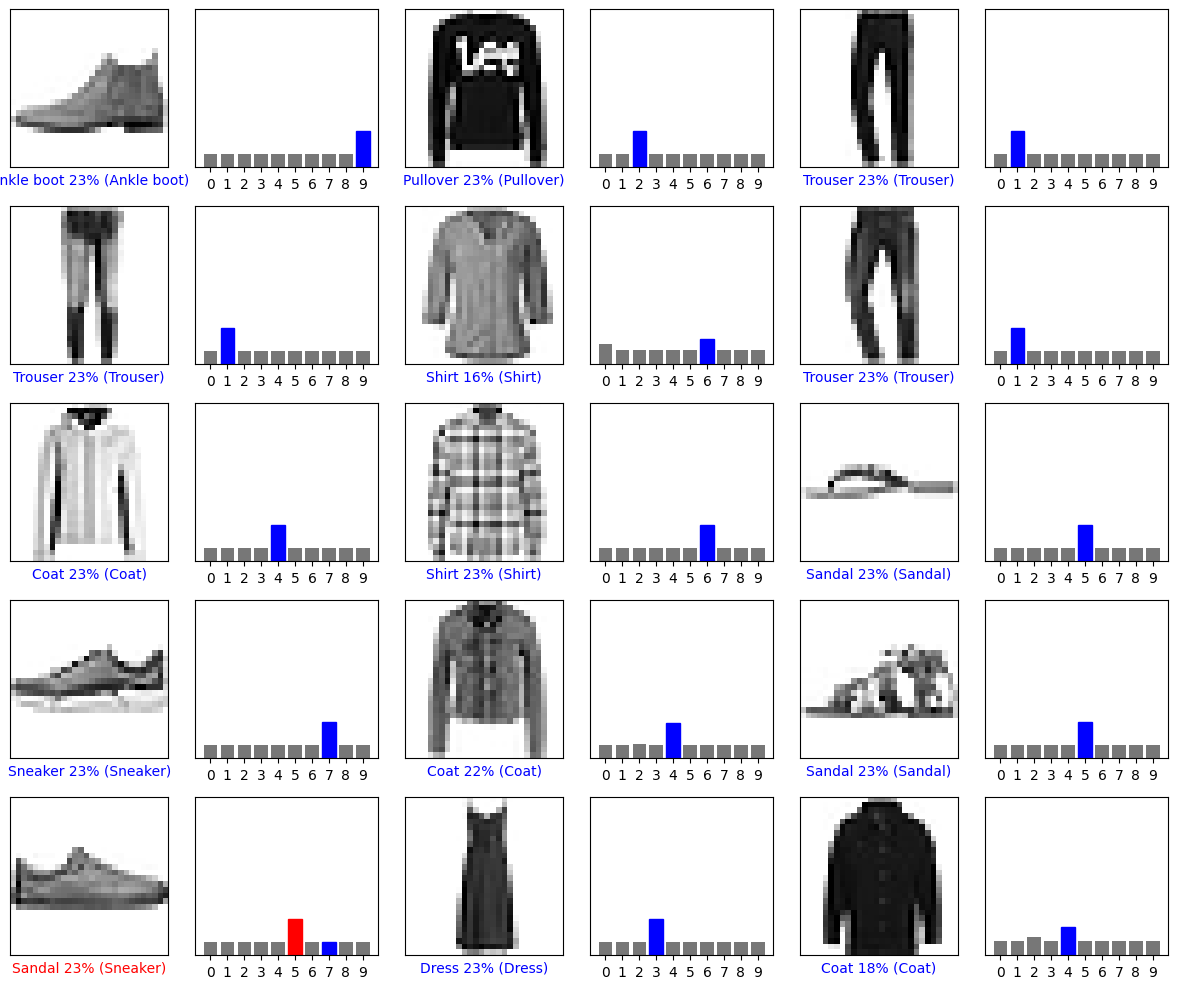

In [45]:
# 몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은
# 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다.
# 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 10)                5

In [47]:
# 딥러닝 모델 만들기
model = tf.keras.Sequential()
# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 만들기
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [48]:
# 모델 컴파일
# 0이 많은 데이터일 때 쓰는 'SparseCategoricalCrossentropy'이 있음(이미지 같은 것)
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [49]:
# validation_data는 학습을 한 번 할 때마다 검증시키는 것(머신러닝에서도 사용가능)
# validation_data로 검증하는 것을 k 폴드 교차 검증이라고 함
history = model.fit(X_train, y_train, epochs=100,
                    validation_data = (X_test, y_test))

Epoch 1/100
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4989 - accuracy: 0.8211 - val_loss: 0.4642 - val_accuracy: 0.8309
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3706 - accuracy: 0.8630 - val_loss: 0.3707 - val_accuracy: 0.8688
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3382 - accuracy: 0.8754 - val_loss: 0.3868 - val_accuracy: 0.8615
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3125 - accuracy: 0.8842 - val_loss: 0.3869 - val_accuracy: 0.8626
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2952 - accuracy: 0.8890 - val_loss: 0.3418 - val_accuracy: 0.8806
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2817 - accuracy: 0.8948 - val_loss: 0.3388 - val_accuracy: 0.8804
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2684 - accuracy: 0.9003 - val_loss: 0.3243 -

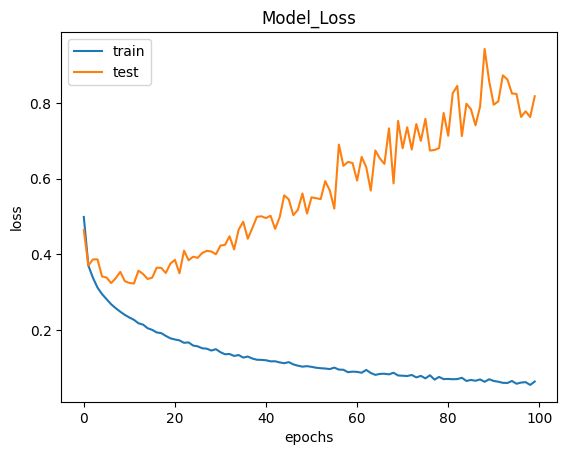

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

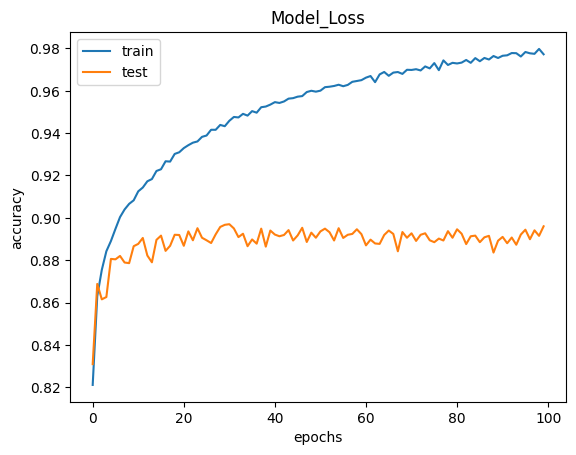

In [51]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_Loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

과적합 해소 방법

In [4]:
# 딥러닝 모델 만들기
model = tf.keras.Sequential()
# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 만들기(Dropout_은 학습한 결과를 날려버리는 것으로 날리는 기준은 랜덤이다)
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['acc'])

In [6]:
history = model.fit(X_train, y_train, epochs= 50,
                    validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 4.1588 - acc: 0.1372 - val_loss: 2.1529 - val_acc: 0.1661
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1787 - acc: 0.1599 - val_loss: 2.0537 - val_acc: 0.1994
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9557 - acc: 0.2251 - val_loss: 1.6382 - val_acc: 0.3458
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7140 - acc: 0.2964 - val_loss: 1.5496 - val_acc: 0.3461
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6339 - acc: 0.3216 - val_loss: 1.4934 - val_acc: 0.3707
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5944 - acc: 0.3333 - val_loss: 1.4968 - val_acc: 0.3725
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5779 - acc: 0.3345 - val_loss: 1.4887 - val_acc: 0.3686
Epoch 8/50
1875/1875 [==============================] - 6s 3m

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

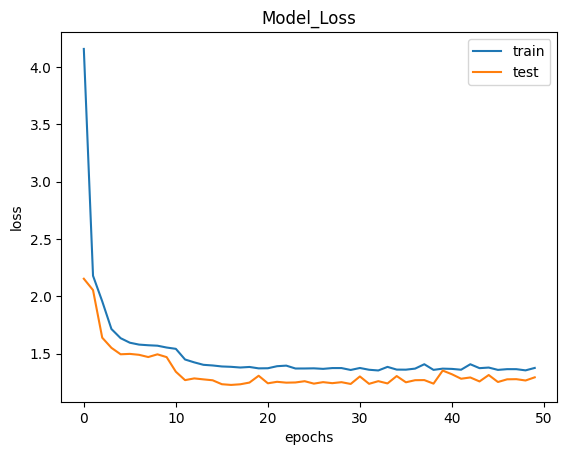

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [10]:
# 딥러닝 모델 만들기
model = tf.keras.Sequential()
# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 만들기(regularize 중 l1은 절대값을 사용하고, l2는 제곱값을 사용함)
model.add(tf.keras.layers.Dense(200, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(50, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, epochs= 50,
                    validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 1.8028 - acc: 0.7709 - val_loss: 0.9386 - val_acc: 0.8115
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8235 - acc: 0.8330 - val_loss: 0.8423 - val_acc: 0.8131
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6889 - acc: 0.8451 - val_loss: 0.6820 - val_acc: 0.8345
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5903 - acc: 0.8487 - val_loss: 0.5598 - val_acc: 0.8484
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5185 - acc: 0.8556 - val_loss: 0.5472 - val_acc: 0.8332
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4783 - acc: 0.8598 - val_loss: 0.5299 - val_acc: 0.8382
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4605 - acc: 0.8630 - val_loss: 0.5162 - val_acc: 0.8376
Epoch 8/50
1875/1875 [==============================] - 6s 3ms

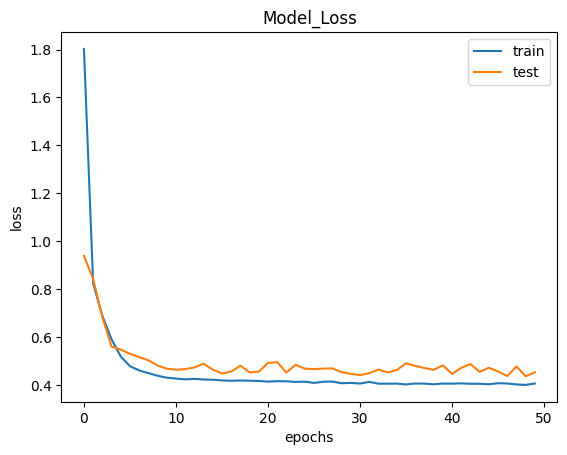

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
# 모델 파일로 저장(확장자만 h5로 저장하면 되고 이름은 마음대로 지정해도 됨)
model.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# 모델 불러오기
load_model = tf.keras.models.load_model('h5-model.h5')

In [16]:
load_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               157000    
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
load_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4530 - acc: 0.8610


[0.45301303267478943, 0.8610000014305115]

In [18]:
# 모델 체크포인트 설정
# 딥러닝 모델 만들기
model = tf.keras.Sequential()
# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# 은닉층 만들기(regularize 중 l1은 절대값을 사용하고, l2는 제곱값을 사용함)
model.add(tf.keras.layers.Dense(200, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(100, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(50, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# 모델 컴파일
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['acc'])

In [19]:
# 모델 체크포인트 설정
cpt = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_cpt.ckpt', # 체크포인트 저장 위치
                                         save_weight_only=True, # 가중치만 저장
                                         save_best_only=True, # 가장 좋은 모델만 저장
                                         monitor='val_loss',
                                         verbose=1)

In [20]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[cpt])

Epoch 1/100
1867/1875 [============================>.] - ETA: 0s - loss: 1.7040 - acc: 0.7693
Epoch 1: val_loss improved from inf to 0.97068, saving model to tmp_cpt.ckpt
1875/1875 [==============================] - 10s 4ms/step - loss: 1.7006 - acc: 0.7695 - val_loss: 0.9707 - val_acc: 0.8023
Epoch 2/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.8091 - acc: 0.8293
Epoch 2: val_loss improved from 0.97068 to 0.78972, saving model to tmp_cpt.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8090 - acc: 0.8292 - val_loss: 0.7897 - val_acc: 0.8262
Epoch 3/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.6688 - acc: 0.8442
Epoch 3: val_loss improved from 0.78972 to 0.64042, saving model to tmp_cpt.ckpt
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6689 - acc: 0.8443 - val_loss: 0.6404 - val_acc: 0.8402
Epoch 4/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.5720 - acc: 0.8507
Epoch 4: val_lo

In [21]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=5)

In [22]:
model.fit(X_train, y_train,
          epochs=100,
          validation_split=0.3,
          callbacks=[earlyStopping, cpt])

Epoch 1/100
1313/1313 [==============================] - ETA: 0s - loss: 0.4000 - acc: 0.8760
Epoch 1: val_loss improved from 0.43583 to 0.38807, saving model to tmp_cpt.ckpt
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4000 - acc: 0.8760 - val_loss: 0.3881 - val_acc: 0.8825
Epoch 2/100
1302/1313 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8763
Epoch 2: val_loss did not improve from 0.38807
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3952 - acc: 0.8761 - val_loss: 0.3958 - val_acc: 0.8805
Epoch 3/100
1305/1313 [============================>.] - ETA: 0s - loss: 0.3965 - acc: 0.8785
Epoch 3: val_loss did not improve from 0.38807
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3963 - acc: 0.8785 - val_loss: 0.4009 - val_acc: 0.8782
Epoch 4/100
1308/1313 [============================>.] - ETA: 0s - loss: 0.3961 - acc: 0.8783
Epoch 4: val_loss did not improve from 0.38807
1313/1313 [=====================

## earlyStopping에 있는 옵션들
1. monitor: 조기종료 기준값 (val_loss, loss, val_acc, acc)
2. min_delta: 최소 업데이트 기준, 변화량이 얼마가 되어야 더 나은 모델로 인식
3. patience: 몇 epocks까지 개선이 없어도 되는가에 대한 기준
4. verbose: 얼마나 상세하게 보여줄지(0, 1)
5. mode: 기본값이 auto, "auto: 자동으로 선택/ min: loss / max: accuracy"
6. baseline: 모니터링할 지표의 기준값, 이값보다 나아지지 않으면 학습종료
7. restore_best_weights: 이전에 모델중에 가장 좋은 값의 모델의 가중치로 복원할 것인가
8. start_from_epoch: 몇번째부터 모니터링을 시작할까

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(36, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['acc'])

In [30]:
# 모델 체크포인트 설정
cpt = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_cpt.ckpt', # 체크포인트 저장 위치
                                         save_weight_only=True, # 가중치만 저장
                                         save_best_only=True, # 가장 좋은 모델만 저장
                                         monitor='val_loss',
                                         verbose=1)

In [27]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 min_delta=0.01,
                                                 patience=5,
                                                 restore_best_weights=True)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 36)                2340      
                                                                 
 dropout_5 (Dropout)         (None, 36)               

In [31]:
history = model.fit(X_train, y_train,
          epochs=100,
          validation_split=0.3,
          callbacks=[earlyStopping, cpt])

Epoch 1/100
1305/1313 [============================>.] - ETA: 0s - loss: 1.1906 - acc: 0.5253
Epoch 1: val_loss improved from inf to 0.98873, saving model to tmp_cpt.ckpt
1313/1313 [==============================] - 8s 6ms/step - loss: 1.1901 - acc: 0.5253 - val_loss: 0.9887 - val_acc: 0.6036
Epoch 2/100
1307/1313 [============================>.] - ETA: 0s - loss: 1.1878 - acc: 0.5262
Epoch 2: val_loss did not improve from 0.98873
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1882 - acc: 0.5262 - val_loss: 0.9969 - val_acc: 0.5882
Epoch 3/100
1299/1313 [============================>.] - ETA: 0s - loss: 1.1873 - acc: 0.5276
Epoch 3: val_loss did not improve from 0.98873
1313/1313 [==============================] - 6s 5ms/step - loss: 1.1877 - acc: 0.5277 - val_loss: 0.9995 - val_acc: 0.5728
Epoch 4/100
1309/1313 [============================>.] - ETA: 0s - loss: 1.1703 - acc: 0.5284
Epoch 4: val_loss did not improve from 0.98873
1313/1313 [==========================